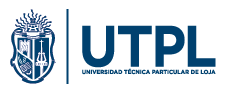

- Estudiante: **Márquez Tepán Juan Fernando**
- Nro. de Cédula: **0105108203**
- Correo: **juanfer-tm@hotmail.com**

## CASO PREPARATORIO DE LA LÍNEA SISTEMAS INTELIGENTES


# Identificar patrones en pacientes con COVID-19 
## Introducción



Sin saberlo dia a dia todos nosotros formamos parte de algoritmos de Aprendizaje Automatico (Machine Learning **ML**) por ejemplo cuando Netflix, Spotify, Amazon, etc., nos recomienda una pelicula, musica o producto; ahora el reto que se nos ha planteado como estudiantes de la Universidad Tecnica Particular de Loja UTPL es, aplicar el concepto de **ML** al campo de la salud, mas especificamente a la nueva enfermedad que al momento (03/08/2020) azota a la humanidad: **COVID-19**

Para lo cual se ha escogido el tema: **Identificar patrones en pacientes con COVID-19**, para esto trabajeremos con Jupyter Notebook y Python, herramientas escogidas por la facilidad de integracion y las multiples librerias que manejan; lo cual en el transcurso del presente documento se ira justificando su uso.


## Desarrollo
Para lograr el objetivo propuesto: **Identificar patrones en pacientes con COVID-19**, se nos ha pasado un conjunto de datos (dataset) que ha sido facilitado por la Univerisad _The Johns Hopkins University_, adicional de las dos herramientas ya indicadas (Jupiter y Python) se trabajo siguiento la metodologia **CRISP-DM**.

A continuacion a modo de resumen se indica una breve descripcion de estas tres herramientas:
- **Python**
Python es el lenguaje principal para el desarrollo de aplicaciones acerca de la ciencia de datos, esto debido a que maneja una gran variedad de bibliotecas para la manipulación de los datos, por ejemplo: Pandas, Sklearn, Matplotlib, etc., y a eso le sumas sus caracteristicas como que es de libre distribucion, multiplataforma, etc., hacen de este lenguaje el favorito de muchos desarrolladores.
- **Jupyter Notebook**
Debido a que el análisis de los datos exige un proceso iterativo y de fácil interacción, Jupyter Notebook cumple con estos requisitos para trabajar con Python ya que se adapta 
- **CRISP-DM**
CRISP-DM viene siendo la metodologia hegemonica en cuanto al desarrollo de proyecto de datos se refiere esto debido a que sus fases no son necesariamente obligatorias sino mas bien bidireccionales, y su capacidad de adaptabilidad hacia los requerimientos hacen de esta metologia la preferida para trabajar con ciencia de datos.

### Visualización de los Datos
Para la carga y visualizacion de los datos lo vamos a realizar con la ayuda de la libreria Pandas.

In [1]:
#Carga de Librerias
#pandas Visualizacion de datos {modelo excel}
#numpy Analisis matematico y cientifico de datos {arrays}
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
##Libreria para la normalizacion
from sklearn import preprocessing
##Librerias para el algoritmo
from sklearn.cluster import KMeans
##Libreria para la grafica
import matplotlib.pyplot as plt

##### Carga del DataSet
Utilizamos el comando
df=pd.read_csv("Leer dataset")

In [2]:
df=pd.read_csv("C:/Users/PC/Desktop/Tesis/Practicum4_SistemasInteligentes_UTPL/DataSet/Dataset.csv",nrows=10000,encoding="ISO-8859-1")

##### Visualización de los 5 primeros registros
Lo hacemos utilizando el comando head()

In [3]:
df.head()

,id,case_in_country,reporting date,location,country,gender,age,symptom_onset,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom
0,1,0,1/20/2020,Shenzhen Guangdong,China,male,66.0,1/3/20,1/11/20,12/29/2019,1/4/20,1,0,0,0,NaN
1,2,0,1/20/2020,Shanghai,China,female,56.0,1/15/2020,1/15/2020,NaN,1/12/20,0,1,0,0,NaN
2,3,0,1/21/2020,Zhejiang,China,male,46.0,1/4/20,1/17/2020,NaN,1/3/20,0,1,0,0,NaN
3,4,0,1/21/2020,Tianjin,China,female,60.0,NaN,1/19/2020,NaN,NaN,1,0,0,0,NaN
4,5,0,1/21/2020,Tianjin,China,male,58.0,NaN,1/14/2020,NaN,NaN,0,0,0,0,NaN


###### Contamos el número de registros que tiene nuestro dataset
Lo hacemos utilizando el comando count()

In [4]:
df.id.count()

1085

##### Visualizacion total del dataset
Visualizacion total de dataset y el número de columnas que posee el mismo
Lo hacemos utilizando el comando count() más el parametro obtenido con el comando count.


In [5]:
df.head(1085)

,id,case_in_country,reporting date,location,country,gender,age,symptom_onset,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom
0,1,0,1/20/2020,Shenzhen Guangdong,China,male,66.0,1/3/20,1/11/20,12/29/2019,1/4/20,1,0,0,0,NaN
1,2,0,1/20/2020,Shanghai,China,female,56.0,1/15/2020,1/15/2020,NaN,1/12/20,0,1,0,0,NaN
2,3,0,1/21/2020,Zhejiang,China,male,46.0,1/4/20,1/17/2020,NaN,1/3/20,0,1,0,0,NaN
3,4,0,1/21/2020,Tianjin,China,female,60.0,NaN,1/19/2020,NaN,NaN,1,0,0,0,NaN
4,5,0,1/21/2020,Tianjin,China,male,58.0,NaN,1/14/2020,NaN,NaN,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,2,2/25/2020,Innsbruck,Austria,NaN,24.0,NaN,NaN,NaN,NaN,0,0,0,0,NaN
1081,1082,1,2/24/2020,Afghanistan,Afghanistan,NaN,35.0,NaN,NaN,NaN,NaN,0,0,0,0,NaN
1082,1083,1,2/26/2020,Algeria,Algeria,male,NaN,NaN,NaN,NaN,2/17/2020,0,0,0,0,NaN
1083,1084,1,2/25/2020,Croatia,Croatia,male,NaN,NaN,NaN,2/19/2020,2/21/2020,0,0,0,0,NaN


### Limpieza y Filtrado de Datos
La limpieza y filtrado de los datos merece una pequeña explicacion, esto debido a su importancia dentro del manejo de la ciencia de datos, ya que ningun modelo de mineria de datos va a generar resultados significativos con datos desordonedos.

#### Descripcion
La limpieza y filtrado de datos es el proceso de identificar, corregir o eliminar registros corruptos o inexactos de un dataset.
Los principales problemas que presenta un dataset son:
1. Datos Perdidos
2. Datos atipicos
3. Data innecesaria: data repetida, data duplicada, etc.
4. Data inconsistente.

#### Filtrado de datos 1 (Eliminar valores NA)
En nuestro dataset hemos decidido eliminar las columnas genero (gender) y edad (age) ya que al tener valores desconocidos NA (NaN dentro del dataset) no aportan mucho a nuestro analisis de datos, por lo que procedemos a actualizar nuestro dataset sin estos valores.

Para esto utilizamos el siguiente comando:

In [6]:
df_New=df[(df["gender"].notnull())&(df["age"].notnull())]

Hacemos un nuevo conteo de nuestro dataset y vemos que tiene 825 registros.

In [7]:
df_New.head(825)

,id,case_in_country,reporting date,location,country,gender,age,symptom_onset,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom
0,1,0,1/20/2020,Shenzhen Guangdong,China,male,66.0,1/3/20,1/11/20,12/29/2019,1/4/20,1,0,0,0,NaN
1,2,0,1/20/2020,Shanghai,China,female,56.0,1/15/2020,1/15/2020,NaN,1/12/20,0,1,0,0,NaN
2,3,0,1/21/2020,Zhejiang,China,male,46.0,1/4/20,1/17/2020,NaN,1/3/20,0,1,0,0,NaN
3,4,0,1/21/2020,Tianjin,China,female,60.0,NaN,1/19/2020,NaN,NaN,1,0,0,0,NaN
4,5,0,1/21/2020,Tianjin,China,male,58.0,NaN,1/14/2020,NaN,NaN,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,1028,32,2/28/2020,Andalusia,Spain,male,58.0,NaN,NaN,NaN,NaN,0,0,0,0,NaN
1029,1030,34,2/28/2020,Zaragoza,Spain,female,27.0,NaN,NaN,NaN,NaN,0,0,0,0,NaN
1030,1031,1,1/31/2020,Jonkoping,Sweden,female,25.0,1/27/2020,NaN,NaN,1/24/2020,1,0,0,0,cough
1052,1053,1,2/21/2020,Lebanon,Lebanon,female,45.0,NaN,NaN,NaN,2/20/2020,0,0,0,0,NaN


#### Filtrado de datos 2 (Modificar valores categoricos)
Como se puede observar nuestro data set tiene valores categoricos en la columna \[gender\]: male y female, por lo que para trabajarlos de una mejor manera lo procedimos a transformar en los siguientes valores: \[1 para hombres y 2 para mujeres\]

Para esto realizamos lo siguiente:

In [8]:
df_New['gender'].replace(['female','male'],[2,1],inplace=True)

Visualizamos nuestro cambio:

In [9]:
df_New.head(825)

,id,case_in_country,reporting date,location,country,gender,age,symptom_onset,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom
0,1,0,1/20/2020,Shenzhen Guangdong,China,1,66.0,1/3/20,1/11/20,12/29/2019,1/4/20,1,0,0,0,NaN
1,2,0,1/20/2020,Shanghai,China,2,56.0,1/15/2020,1/15/2020,NaN,1/12/20,0,1,0,0,NaN
2,3,0,1/21/2020,Zhejiang,China,1,46.0,1/4/20,1/17/2020,NaN,1/3/20,0,1,0,0,NaN
3,4,0,1/21/2020,Tianjin,China,2,60.0,NaN,1/19/2020,NaN,NaN,1,0,0,0,NaN
4,5,0,1/21/2020,Tianjin,China,1,58.0,NaN,1/14/2020,NaN,NaN,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,1028,32,2/28/2020,Andalusia,Spain,1,58.0,NaN,NaN,NaN,NaN,0,0,0,0,NaN
1029,1030,34,2/28/2020,Zaragoza,Spain,2,27.0,NaN,NaN,NaN,NaN,0,0,0,0,NaN
1030,1031,1,1/31/2020,Jonkoping,Sweden,2,25.0,1/27/2020,NaN,NaN,1/24/2020,1,0,0,0,cough
1052,1053,1,2/21/2020,Lebanon,Lebanon,2,45.0,NaN,NaN,NaN,2/20/2020,0,0,0,0,NaN


#### Filtrado de datos 3 (Desglose de columnas)
De acuerdo al trabajo que estamos realizando en donde estamos tratando de identificar patrones de pacientes con **Covid-19** se ve la necesidad de desglosar la columna \[symptom\], para esto vamos a agregar 8 columnas a nuestro dataset:
1. {fever,high fever,mild fever}
* {cough,coughing,cough with sputum}
* {vomiting,nausea,Fatigue}
* {difficult in breathing,respiratory distress,shortness of breath,difficulty breathing}
* {Headache,heavy head}
* {sore throat,throat pain,throat discomfort,itchy throat}
* {chill,chills,cold}
* {otherSymptom}

Estas columnas se llenaran con ceros y unos (0 y 1) en donde 1 significa que presenta el sintoma y 0 significa que no presenta el sintoma

#### Agregar columna {fever,high fever,mild fever}
Para realizar esto vamos a utilizar el siguiente comando:

In [10]:
df_New["fever, mild_Fever, high_Fever"]=((df_New["symptom"].str.contains('fever',na=False,regex=False))*1)

Visualizamos el cambio, en donde se puede ver la columna y el nuevo tamaño de nuestro dataframe: 17 columnas

In [11]:
##### Visualizacion Fila desde la 300 a la 310
df_New[300:310]

,id,case_in_country,reporting date,location,country,gender,age,symptom_onset,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,"fever, mild_Fever, high_Fever"
334,335,99,2/22/2020,Hokkaido,Japan,1,85.0,2/3/20,2/3/20,NaN,NaN,0,0,1,0,difficulty breathing,0
335,336,100,2/22/2020,Hokkaido,Japan,1,75.0,2/16/2020,2/20/2020,NaN,NaN,0,0,0,0,fever/ cough/ malaise,1
336,337,101,2/22/2020,Hokkaido,Japan,2,55.0,2/17/2020,2/19/2020,NaN,NaN,0,0,0,0,NaN,0
337,338,102,2/22/2020,Hokkaido,Japan,1,65.0,2/10/20,2/10/20,NaN,NaN,0,0,0,0,fever,1
338,339,103,2/22/2020,Hokkaido,Japan,2,55.0,2/15/2020,2/16/2020,NaN,NaN,0,0,0,0,fatigue/ malaise/ headache,0
339,340,104,2/22/2020,Hokkaido,Japan,2,15.0,2/6/20,2/7/20,NaN,NaN,0,0,0,0,fever/ sore throat/ malaise,1
340,341,105,2/22/2020,Hokkaido,Japan,2,55.0,2/13/2020,2/15/2020,NaN,NaN,0,0,0,0,sore throat/ cough/ fever,1
341,342,106,2/22/2020,Tokyo,Japan,1,65.0,2/12/20,NaN,NaN,NaN,0,0,0,0,fever/ cough,1
342,343,107,2/22/2020,Nagoya City,Japan,2,65.0,2/19/2020,2/21/2020,NaN,NaN,0,0,0,0,fever/ nasal discharge/ headache,1
343,344,108,2/22/2020,Nagoya City,Japan,2,46.0,2/20/2020,2/21/2020,NaN,NaN,0,0,0,0,fever,1


In [12]:
df_New.shape

(825, 17)

#### Agregar resto de columnas.
Agregamos el resto de columnas aplicando el mismo procedimiento indicado en el punto anterior


In [13]:
#Agregar columna 2
df_New["cough, coughing, cough_with_sputum"]=((df_New["symptom"].str.contains('cough',na=False,regex=False))*1)

In [14]:
#Agregar columna 3
df_New["vomiting, nausea, fatigue"]=((df_New["symptom"].str.contains('vomiting|nausea|fatigue',na=False,regex=True))*1)

In [15]:
##Agregar columna 4
df_New["difficult_in_breathing, respiratory_distress, shortness_of_breath, difficulty_breathing"]=(df_New["symptom"].str.contains('breath|distress',na=False,regex=True))*1

In [16]:
##Agregar columna 5
df_New["headache, heavy_head"]=((df_New["symptom"].str.contains('head',na=False,regex=False))*1)

In [17]:
##Agregar columna 6
df_New["sore_throat, throat_pain, throat_discomfort, itchy_throat"]=((df_New["symptom"].str.contains('throat',na=False,regex=False))*1)

In [18]:
##Agregar columna 7
df_New["chill, chills, cold"]=((df_New["symptom"].str.contains('chill|cold',na=False, regex=True))*1)

In [19]:
##Agregar columna 8
df_New["other symptom"]=((df_New["symptom"].str.contains('joint|runny|diarrhea|abdominal|pneumonia|loss|malaise|sputum|muscle|breathlessness|dyspnea|loss|nasal|mild|sneeze|chest|thirst|flu|cramps|aching|body|aches|reflux|physical|tired|myalgias',na=False,regex=True))*1)

#### Filtrado de datos 4 (Correcciones)
Como estamos manejando la metodologia CRISP-DM en donde se indicaba que esta era muy flexible, se identifico que en la columna \[symptom\] existen valores con (NA), esto quiere decir que el paciente no presentaba ningun tipo de sintoma por lo que se creo una nueva columna asintomatico \[asymptomatic\] (en ingles únicamente por mantener la nomenclatura).

In [20]:
df_New["asymptomatic"]=((df_New["symptom"].str.contains('SinSintomas',na=True,regex=True))*1)

Visualizamos nuestro nuevo dataset con 25 columnas 

In [21]:
df_New[200:210]

,id,case_in_country,reporting date,location,country,gender,age,symptom_onset,hosp_visit_date,exposure_start,...,symptom,"fever, mild_Fever, high_Fever","cough, coughing, cough_with_sputum","vomiting, nausea, fatigue","difficult_in_breathing, respiratory_distress, shortness_of_breath, difficulty_breathing","headache, heavy_head","sore_throat, throat_pain, throat_discomfort, itchy_throat","chill, chills, cold",other symptom,asymptomatic
226,227,30,2/27/2020,Nantes,France,2,58.0,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,1
227,228,31,2/27/2020,Montpellier,France,1,31.0,NaN,2/27/2020,NaN,...,NaN,0,0,0,0,0,0,0,0,1
229,230,33,2/27/2020,Brest,France,1,72.0,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,1
231,232,35,2/27/2020,Lyon,France,1,50.0,NaN,2/26/2020,NaN,...,NaN,0,0,0,0,0,0,0,0,1
233,234,37,2/27/2020,Annecy,France,2,35.0,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,1
235,236,39,2/28/2020,Nice,France,2,23.0,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,1
236,237,1,1/15/2020,Kanagawa,Japan,1,35.0,1/3/20,1/6/20,NaN,...,fever,1,0,0,0,0,0,0,0,0
237,238,2,1/24/2020,Tokyo,Japan,1,45.0,1/14/2020,1/15/2020,NaN,...,NaN,0,0,0,0,0,0,0,0,1
238,239,3,1/25/2020,Tokyo,Japan,2,35.0,1/21/2020,1/23/2020,NaN,...,NaN,0,0,0,0,0,0,0,0,1
239,240,4,1/26/2020,Aichi Prefecture,Japan,1,45.0,1/23/2020,1/24/2020,NaN,...,NaN,0,0,0,0,0,0,0,0,1


#### Filtrado de datos 5 (Eliminación de columnas)
Se procede a eliminar la columna \[symptom\] ya que la misma ya fue desglosada.

Para esto utilizamos el siguiente código:

In [22]:
df_New.drop(['symptom'], axis=1, inplace=True)

### Ver la informacion basica del dataset (índices, tipos de columna, valores no nulos y uso de memoria)
En esta parte una vez que ya hemos filtrado los datos, debemos tener claro los valores, campos, tipos de datos, etc.,  que contienen nuestro dataset, esto con el fin de poder realizar el procesamiento de los datos y aplicar el algoritmo que mas se adapte a las circunstancias.

Para esto utilizamos los siguientes comandos

In [23]:
df_New.info()
df_New.dtypes


<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 1084
Data columns (total 24 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   id                                                                                       825 non-null    int64  
 1   case_in_country                                                                          825 non-null    int64  
 2   reporting date                                                                           825 non-null    object 
 3   location                                                                                 825 non-null    object 
 4   country                                                                                  825 non-null    object 
 5   gender                                                         

id                                                                                           int64
case_in_country                                                                              int64
reporting date                                                                              object
location                                                                                    object
country                                                                                     object
gender                                                                                       int64
age                                                                                        float64
symptom_onset                                                                               object
hosp_visit_date                                                                             object
exposure_start                                                                              object
exposure_e

Ver las estadísticas descriptivas de las columnas numéricas de nuestro dataset.

Lo hacemos de la siguiente manera

In [24]:
statistics = df_New.describe()
print (statistics)

                id  case_in_country     gender         age  visiting Wuhan  \
count   825.000000       825.000000  825.00000  825.000000      825.000000   
mean    467.604848        45.140606    1.42303   49.755758        0.179394   
std     287.832739        82.593516    0.49434   17.991875        0.383915   
min       1.000000         0.000000    1.00000    0.500000        0.000000   
25%     237.000000         1.000000    1.00000   35.000000        0.000000   
50%     448.000000        22.000000    1.00000   51.000000        0.000000   
75%     681.000000        65.000000    2.00000   64.000000        0.000000   
max    1085.000000      1443.000000    2.00000   96.000000        1.000000   

       from Wuhan       death   recovered  fever, mild_Fever, high_Fever  \
count  825.000000  825.000000  825.000000                     825.000000   
mean     0.181818    0.070303    0.173333                       0.243636   
std      0.385929    0.255812    0.378765                       0.429

### Aplicación del Algoritmo
Una vez que tenemos listo nuestro conjunto de datos, vamos a aplicar el algoritmo que mas se adapte al dataset, para esto debemos tener muy claro el objetivo a realizar, que en nuestro caso es: **Identificar patrones en pacientes con COVID-19**.

#### Algoritmos de Clusterización
Para el presente ejemplo vamos a utilizar el algoritmo de clusterización **K-Means**, para eso vamos a ver primero algunas definiciones.

##### Aprendizaje No Supervisado
El aprendizaje no supervisado es donde entrena un algoritmo de aprendizaje automático, pero este no da la respuesta al problema, es decir no tenemos una variable de respuesta.

##### K-Means
El algoritmo de agrupamiento o clusterización **K-Means** es un algoritmo de aprendizaje automático no supervisado. A diferencia de los algoritmos tradicionales de aprendizaje automático supervisados, **K-Means** intenta clasificar los datos sin haber sido entrenado.

**K-Means** puede aplicarse en:
* Perfiles de cliente
* Segmentacion de mercado
* Categorización
* Detección de Fraudes
* etc.

##### Explicación breve del funcionamiento de K-Means
El algoritmo de clusterización K-Means es un proceso iterativo en el que se intenta minimizar la distancia del punto de datos desde el punto de datos promedio en el clúster, es decir trata de crear los clusters de datos más cercanos posibles, para esto se necesita definir el número de clústeres que necesita y los puntos de datos medios iniciales
El algoritmo luego agrupará los puntos de datos alrededor de las medias dependiendo de la distancia

Bueno despues de esta breve introducción, continuemos.

#### Proprocesado del dataset
En casi la mayoría de los casos el dataset no se ajusta a un modelo para poder aplicar el agrupamiento, ya sea por los tipos de datos, datos vacíos, etc., por lo que   Por problemas de aplicabilidad del algoritmo debemos por decirlo asi igualar los datos de tal manera que se ajuste al algoritmo de Clusterizacion que vamos a aplicar, en este caso vamos a ir por los campos que contiene fechas de tipo objeto:  \[id\], \[reporting\], \[date\], \[location\], \[country\], \[symptom_onset\], \[hosp_visit_date\], \[exposure_start\] y \[exposure_end\]

En este primero vamos a respaldar las columnas en un dateframe en este caso llamado \[fechas\] y luego procedemos a eliminar las mismas, recordando que luego vamos a volver a insertar estas columnas.

Para esto usamos los siguientes comandos:

In [25]:
#Respaldo
Id = df_New[['id']]
reporting = df_New[['reporting date']]
location = df_New[['location']]
country = df_New[['country']]
symptom_onset=df_New [['symptom_onset']]
hosp_visit_date = df_New[['hosp_visit_date']]
exposure_start=df_New[['exposure_start']]
exposure_end=df_New[['exposure_end']]

In [26]:
#Eliminacion
df_New = df_New.drop(['id','reporting date','location','country','symptom_onset','hosp_visit_date','exposure_start','exposure_end'], axis=1)

In [27]:
#Contar registros
df_New.case_in_country.count()

825

#### Normalización
Procedemos a normalizar los datos con el fin de que los valores de los atributos esten en escalas iguales, en nuestro caso se va normalizar la columna edad \[age\].

Para esto vamos a utilizar la libreria **sklearn.preprocessing**, la función MinMaxScaler() para normalizar los datos entre \[0, 1\].

In [28]:
#%% Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df_New)
df_escalado = pd.DataFrame(df_escalado)
# Colocamos el resultado en un dataset.
df_escalado = df_escalado.rename(columns = {0: 'case_in_country', 1: 'gender',2: 'age',3: 'visiting Wuhan',4: 'from Wuhan',5: 'death',6: 'recovered',7: 'fever, mild_Fever, high_Fever',8: 'cough, coughing, cough_with_sputum',9: 'vomiting, nausea, fatigue',10: 'difficult_in_breathing, respiratory_distress, shortness_of_breath, difficulty_breathing',11: 'headache, heavy_head',12: 'sore_throat, throat_pain, throat_discomfort, itchy_throat',13: 'chill, chills, cold',14: 'other symptom',15: 'asymptomatic'})

#### Representación Grafica
Para aplicar el algoritmo vamos a utilizar la libreria **sklearn.cluste.KMeans** y para la representación grafica nuestro dataset se va a utilizar la librería **matplotlib.pyplot.plt**

En esta parte podemos "jugar" con la data teniendo en cuenta que no existe el mejor algoritmo de agrupacion para todos los casos, por lo que se sugiere explorar con otros algoritmos de clustering

En este caso vamos a trabajar sonbre los atributos death \[death\] y genero \[gender\] respectivamente.

##### Aplicación Algoritmo KMeans
Para aplicar el algoritmo K-Means primero necesitamos saber cuantos clusteres vamos a aplicar, es decir el valor de **K**, para esto existen diferentes maneras, aunque no existe un mejor metodo, ya que al igual que el algoritmos de agrupación, estos quedan a criterio de la persona que esta realizando el análisis de datos.

En este caso vamos a utilizar el  **Método Elbow** en el que se calcula y se representa gráficamente la suma de cuadrados en cada número de clusters, y el usuario busca un cambio de pendiente de empinado a poco profundo (un codo) para determinar el número óptimo de clusters

Para esto aplicamos el siguiente código, con la ayuda de la libreria **sklearn.cluste.KMeans**

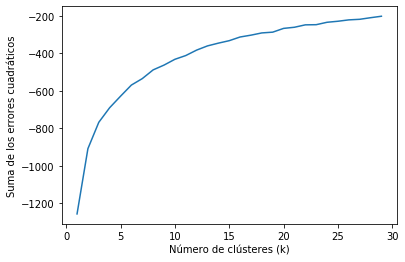

In [29]:
nc = range(1, 30) 
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

Según el gráfico presentado el número sugerido de cluster es cinco y diez (5 y 10), vamos a intentar con un k=10, recordando que no hay existe valor **K** correcto.

In [30]:
#%% Aplicación de k-means con k = 10.
kmeans = KMeans(n_clusters=5).fit(df_escalado)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 3.22085845e-02  8.32667268e-16  5.14052882e-01 -2.22044605e-16
   2.80334728e-01  1.54811715e-01  2.00836820e-01  8.88178420e-16
   4.16333634e-16  6.93889390e-17  6.93889390e-17 -5.20417043e-17
   3.46944695e-17 -5.20417043e-17 -3.19189120e-16  1.00000000e+00]
 [ 5.14743031e-02  6.66133815e-16  5.66559703e-01  7.09677419e-02
   9.03225806e-02  4.51612903e-02  1.09677419e-01  8.32258065e-01
   3.87096774e-01  5.80645161e-02  7.09677419e-02  5.80645161e-02
   1.03225806e-01  4.51612903e-02  3.16129032e-01  2.10942375e-15]
 [ 4.07235973e-02  1.00000000e+00  5.36896177e-01  1.32075472e-01
   1.41509434e-01  9.43396226e-03  2.07547170e-01  6.79245283e-01
   5.00000000e-01  7.54716981e-02  5.66037736e-02  6.60377358e-02
   1.69811321e-01  8.49056604e-02  3.67924528e-01  1.11022302e-16]
 [ 2.69995815e-02  1.00000000e+00  5.22938158e-01 -1.94289029e-16
   2.67326733e-01  6.43564356e-02  1.73267327e-01  8.04911693e-16
   3.88578059e-16  6.24500451e-17  6.24500451e-17 -3.81639165e-17
   1.31

##### Etiquetado de datos
Una vez aplicado **K-Means** ya tenemos los centroides, por lo que procedemos a asignar a cada registro de nuestro dataset uno de los clústers:

In [31]:
#Etiquetado de datos
grupo = kmeans.predict(df_escalado)
df_New['Grupo'] = grupo

Anadimos las columnas que quitamos de nuestro dataset

In [32]:
df_New.insert(0,'id', Id)


In [33]:
df_New.insert(2,'reporting date', reporting)


In [34]:
df_New.insert(3,'location', location)


In [35]:
df_New.insert(4,'country', country)


In [36]:
df_New.insert(7,'symptom_onset', symptom_onset)


In [37]:
df_New.insert(8,'hosp_visit_date', hosp_visit_date)

In [38]:

df_New.insert(9,'exposure_start', exposure_start)


In [39]:
df_New.insert(10,'exposure_end', exposure_end)

In [40]:
##Contamos los registros
df_New.id.count()

825

In [41]:
#Visualizamos los registros
df_New.head()

,id,case_in_country,reporting date,location,country,gender,age,symptom_onset,hosp_visit_date,exposure_start,...,"fever, mild_Fever, high_Fever","cough, coughing, cough_with_sputum","vomiting, nausea, fatigue","difficult_in_breathing, respiratory_distress, shortness_of_breath, difficulty_breathing","headache, heavy_head","sore_throat, throat_pain, throat_discomfort, itchy_throat","chill, chills, cold",other symptom,asymptomatic,Grupo
0,1,0,1/20/2020,Shenzhen Guangdong,China,1,66.0,1/3/20,1/11/20,12/29/2019,...,0,0,0,0,0,0,0,0,1,4
1,2,0,1/20/2020,Shanghai,China,2,56.0,1/15/2020,1/15/2020,NaN,...,0,0,0,0,0,0,0,0,1,3
2,3,0,1/21/2020,Zhejiang,China,1,46.0,1/4/20,1/17/2020,NaN,...,0,0,0,0,0,0,0,0,1,0
3,4,0,1/21/2020,Tianjin,China,2,60.0,NaN,1/19/2020,NaN,...,0,0,0,0,0,0,0,0,1,4
4,5,0,1/21/2020,Tianjin,China,1,58.0,NaN,1/14/2020,NaN,...,0,0,0,0,0,0,0,0,1,0


##### Representacion Grafica


In [42]:
colores=['red','green','blue','yellow','fuchsia','purple','pink','silver','orange','maroon','sky blue','violet','amber','jade','lime']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) 
# Marco centroides.
plt.xlabel('age')
plt.ylabel('death')
plt.title('[Prueba]')
plt.show()

NameError: name 'labels' is not defined